/tmp/ipykernel_121400/4153477977.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rate = df.groupby('spending_bucket')['failure'].mean()


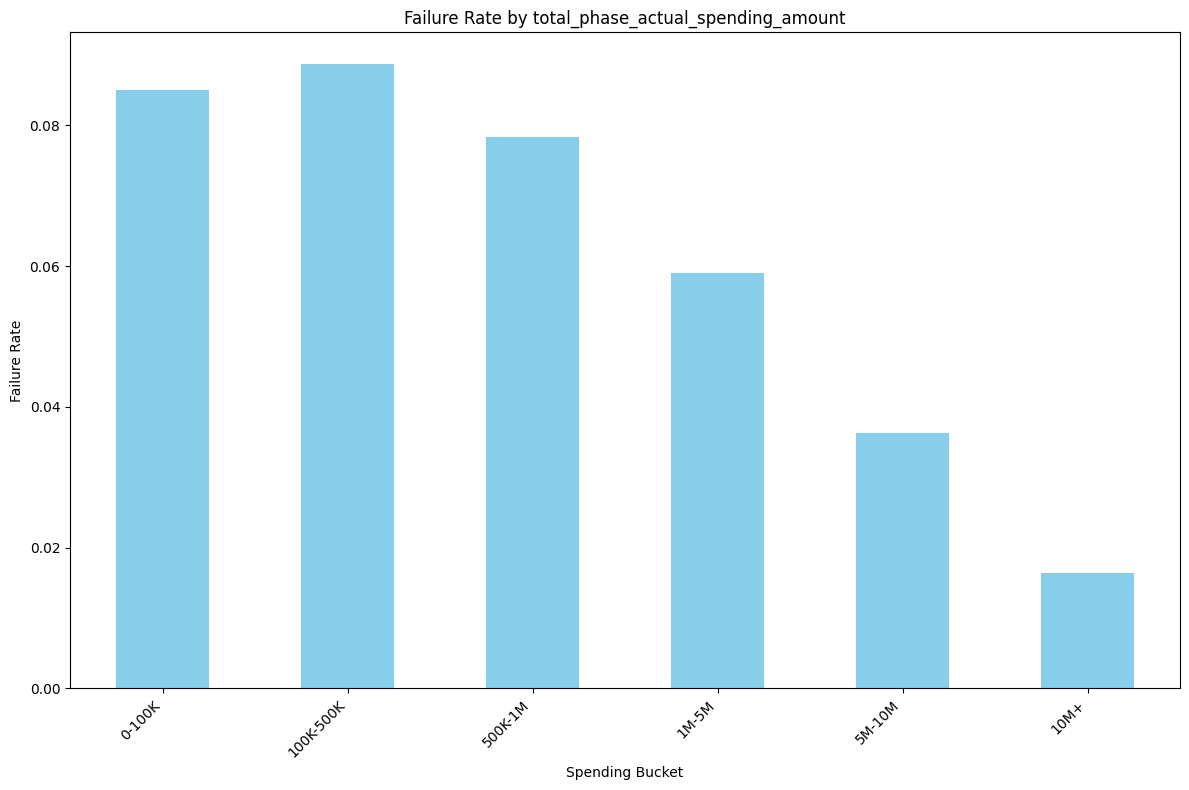

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Calculate total spending for each project (if there's a relevant spending column, adjust accordingly)
# For demonstration, let's assume 'total_phase_actual_spending_amount' represents the total spending.
df['total_spending'] = df['total_phase_actual_spending_amount']

# Define spending ranges or buckets
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, float('inf')]
labels = ['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']


# Assign each project to a spending bucket
df['spending_bucket'] = pd.cut(df['total_spending'], bins=bins, labels=labels)

# Calculate the failure rate for each spending bucket
failure_rate = df.groupby('spending_bucket')['failure'].mean()

# Sort the failure rate for better visualization
failure_rate = failure_rate.sort_index()

# Create a bar chart
plt.figure(figsize=(12, 8))
failure_rate.plot(kind='bar', color='skyblue')
plt.title('Failure Rate by total_phase_actual_spending_amount')
plt.xlabel('Spending Bucket')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


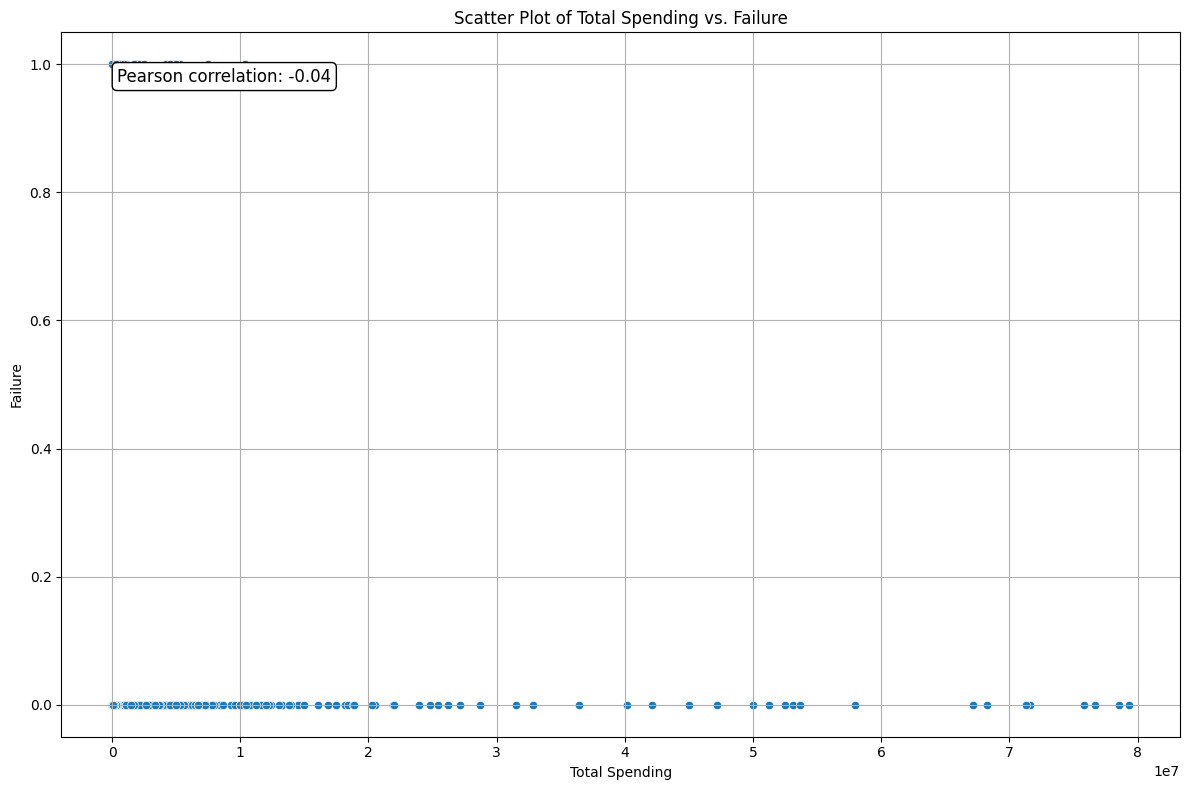

In [23]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

# Scatter plot with correlation coefficient
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_spending', y='failure', data=df)
plt.title('Scatter Plot of Total Spending vs. Failure')
plt.xlabel('Total Spending')
plt.ylabel('Failure')
plt.grid(True)
plt.tight_layout()

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(df['total_spending'], df['failure'])
plt.annotate(f'Pearson correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Show the plot
plt.show()
